In [1]:
#importowanie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("PreProcessedData.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,Ground Label
0,0,Ann Coulter Make Believes She Has ‘Gay Friend...,"It s hard to believe, but Donald Trump does ha...",fake
1,1,Rating: Moody‘s verbessert Ausblick für Russla...,bankensektor Der russische Staat werde die Ban...,fake
2,2,CAN WE ADD DIRTY MONEY ‘LAUNDERING’ To The Oba...,A member of the House Intelligence Committee i...,fake
3,3,Republicans on Obamacare repeal: 'We're going ...,WASHINGTON (Reuters) - House of Representative...,true
4,4,"Trump, on possible DACA deal, says border wall...",WASHINGTON (Reuters) - U.S. President Donald T...,true


In [7]:
#usunm ta jedna kolumne bo jest useless
df.drop(df.columns[0], inplace=True, axis=1)

In [11]:
df.rename(columns = {'Ground Label': 'label'},inplace=True)

# 1. Analiza całokształtu zadania - CEL

In [5]:
#Cel: mamy title newsa, text i ground label czyli informacje czy to jest fake czy nie -> 
#musimy stworzyc model klasyfikacji ktory bedzie to stwierdzac

# 2. Wizualizacja danych

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69045 entries, 0 to 69044
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   68365 non-null  object
 1   text    68978 non-null  object
 2   label   69045 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [13]:
df.shape

(69045, 3)

In [14]:
df['label'].value_counts()

fake    42159
true    26886
Name: label, dtype: int64

c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

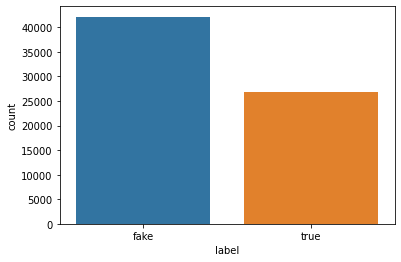

In [15]:
sns.countplot(df.label)

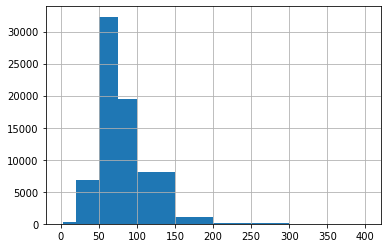

In [9]:
df['title'].str.len().hist(bins=[0,3,20,50,75,100,150,200,300,400])
plt.show()

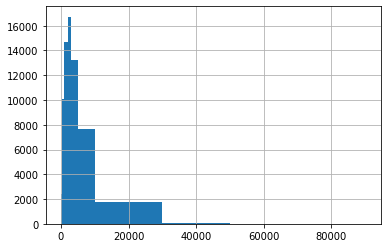

In [10]:
df['text'].str.len().hist(bins=[0,50,200,300,1000,2000,3000,5000,10000,30000,50000,90000])
plt.show()

In [17]:
df.isna().sum() #te co nie maja tekstu - usunmy najlepiej, a tytulu doklejmy do textu

title    680
text      67
label      0
dtype: int64

c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


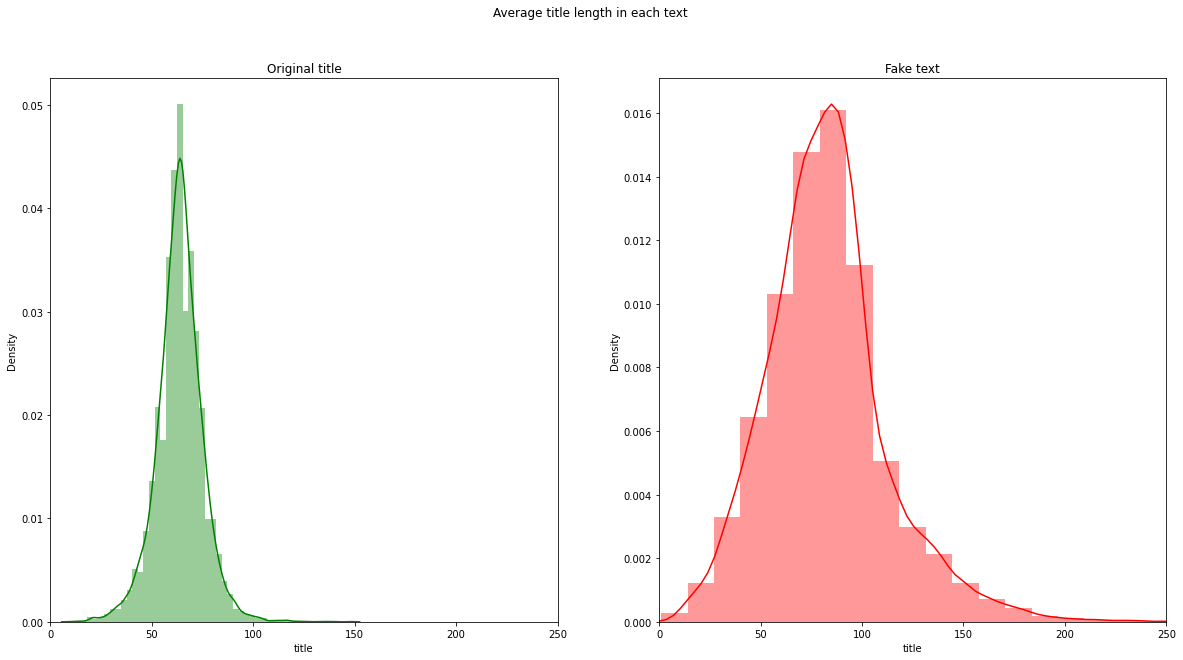

In [56]:
#average title length in each text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))

len_word_true=df[df['label']=='true']['title'].str.len()
sns.distplot(len_word_true.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_xlim([0,250])
ax1.set_title('Original title')

len_word_false=df[df['label']=='fake']['title'].str.len()
sns.distplot(len_word_false.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_xlim([0,250])
ax2.set_title('Fake text')

fig.suptitle('Average title length in each text')

plt.show()

c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


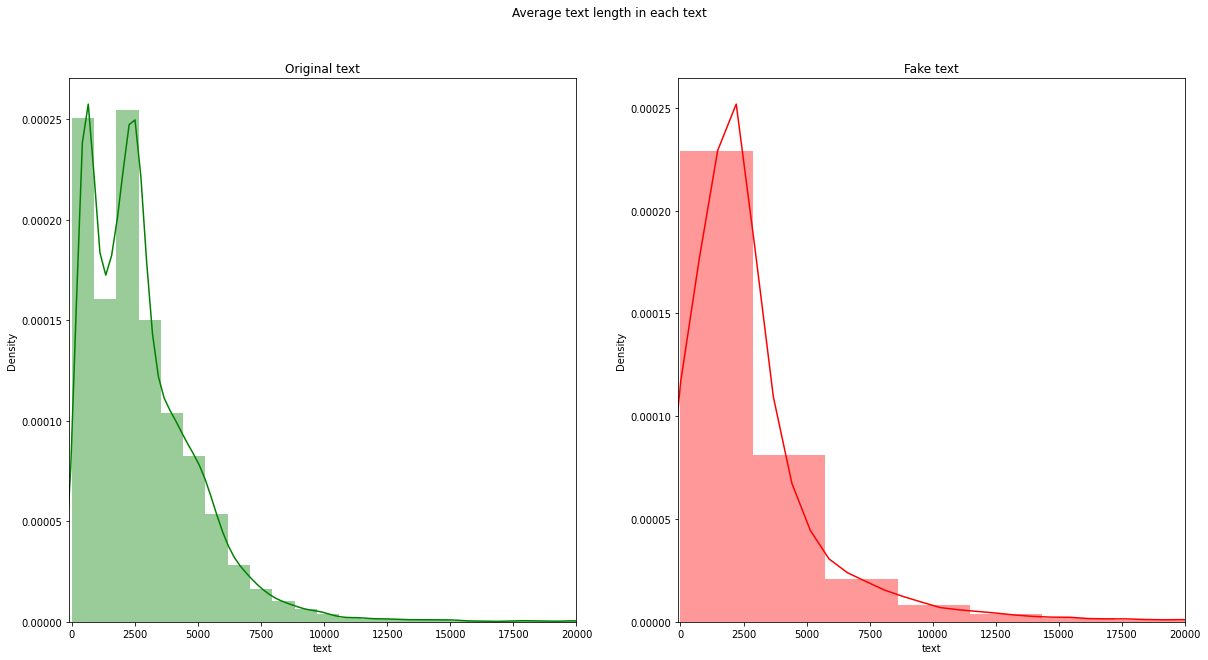

In [54]:
#average word length in each text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
len_word_true=df[df['label']=='true']['text'].str.len()
sns.distplot(len_word_true.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Original text')
ax1.set_xlim([-100,20000])

len_word_false=df[df['label']=='fake']['text'].str.len()
sns.distplot(len_word_false.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Fake text')

fig.suptitle('Average text length in each text')
ax2.set_xlim([-100,20000])
plt.show()

In [39]:
?sns.distplot

In [ ]:
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['label']=='fake']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

# 3. Preprocessing

In [11]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string

In [14]:
df.head()

,text,Ground Label
0,"It s hard to believe, but Donald Trump does ha...",fake
1,bankensektor Der russische Staat werde die Ban...,fake
2,A member of the House Intelligence Committee i...,fake
3,WASHINGTON (Reuters) - House of Representative...,true
4,WASHINGTON (Reuters) - U.S. President Donald T...,true


In [10]:
#funkcje do text ana
ps = PorterStemmer()
corpus = []
for i in range(0, 10):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [15]:
def wordopt(text):
    text = str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [22]:
wordopt(df.iloc[0,2])

'it s hard to believe  but donald trump does have a sizable amount of supporters who agree with his ideas on immigration and guns  unsurprisingly  one of those people is ann coulter  a racist in her own regard  she falls perfectly into trump s fan base after the shooting massacre at a gay nightclub in orlando  florida  coulter tweeted out  to my gay friends  please consider the possibility that hillary s immigration policies might get you killed  see trump s speech today  to my gay friends  please consider the possibility that hillary s immigration policies might get you killed  see trump s speech today   ann coulter   anncoulter  june     first  what gay person would be her friend  and before you get offended in any regard to that question  you know who you are  i m a lesbian and find coulter repulsive on every level  which leads to the bigger question  what person  in general  would be her friend during his speech  trump of course spent time doubling down on his racist and islamophob

In [12]:
corpus[0]

'hard believ donald trump sizabl amount support agre idea immigr gun unsurprisingli one peopl ann coulter racist regard fall perfectli trump fan base shoot massacr gay nightclub orlando florida coulter tweet gay friend pleas consid possibl hillari immigr polici might get kill see trump speech today gay friend pleas consid possibl hillari immigr polici might get kill see trump speech today ann coulter anncoult june okay first gay person would friend get offend regard question know lesbian find coulter repuls everi level lead bigger question person gener would friend speech trump cours spent time doubl racist islamophob remark muslim ban immigr unit state coulter trump even recogn fact shooter whose name never mention want actual born unit state abl access arsen weaponri ammunit florida unit state lax gun law like almost everi shooter way truli combat sort issu tri prevent happen first place alway chang mindset sure hell tri prevent potenti terrorist own gun thing ann coulter ann coulter

In [17]:
df.iloc[0,2]

"It s hard to believe, but Donald Trump does have a sizable amount of supporters who agree with his ideas on immigration and guns. Unsurprisingly, one of those people is Ann Coulter. A racist in her own regard, she falls perfectly into Trump s fan base.After the shooting massacre at a gay nightclub in Orlando, Florida, Coulter tweeted out: To my gay friends: Please consider the possibility that Hillary s immigration policies might get you killed. See Trump s speech today. To my gay friends: Please consider the possibility that Hillary's immigration policies might get you killed. See Trump's speech today.  Ann Coulter (@AnnCoulter) June 13, 2016Okay, first, what gay person would be her friend? And before you get offended in any regard to that question (you know who you are) I m a lesbian and find Coulter repulsive on every level. Which leads to the bigger question  what person, in general, would be her friend?During his speech, Trump of course spent time doubling-down on his racist and 

In [16]:
df["text"] = df["text"].apply(wordopt)

In [18]:
df.head()

,text,Ground Label
0,it s hard to believe but donald trump does ha...,fake
1,bankensektor der russische staat werde die ban...,fake
2,a member of the house intelligence committee i...,fake
3,washington reuters house of representative...,true
4,washington reuters u s president donald t...,true


# 4. Uczenie modelu

In [19]:
label_encoder = preprocessing.LabelEncoder()
df['Ground Label']= label_encoder.fit_transform(df['Ground Label'])

In [20]:
#splitting
x = df["text"]
y = df["Ground Label"]
x

0        it s hard to believe  but donald trump does ha...
1        bankensektor der russische staat werde die ban...
2        a member of the house intelligence committee i...
3        washington  reuters    house of representative...
4        washington  reuters    u s  president donald t...
                               ...                        
69040    nairobi  reuters    burundi s main opposition ...
69041    miss universe  alicia machado is now an americ...
69042    the daily sheeple   by ryan banister   an awar...
69043    jesus f cking christ our president  is a moron...
69044    if she s not toast now then we re in bigger tr...
Name: text, Length: 69045, dtype: object

In [21]:
y

0        0
1        0
2        0
3        1
4        1
        ..
69040    1
69041    0
69042    0
69043    0
69044    0
Name: Ground Label, Length: 69045, dtype: int32

In [80]:
df.head()

,text,Ground Label
0,it s hard to believe but donald trump does ha...,0
1,bankensektor der russische staat werde die ban...,0
2,a member of the house intelligence committee i...,0
3,washington reuters house of representative...,1
4,washington reuters u s president donald t...,1


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
# a co zeby zrobic warstwowe probkowanie i zachowac stosunek?

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [24]:
xv_train

<51783x183528 sparse matrix of type '<class 'numpy.float64'>'
	with 11920457 stored elements in Compressed Sparse Row format>

In [27]:
y_train

53489    0
11616    1
21507    1
57582    1
40905    1
        ..
2314     1
21027    1
60391    1
33140    0
34697    1
Name: Ground Label, Length: 51783, dtype: int32

In [26]:
print(xv_train.shape)

(51783, 183528)


In [84]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [85]:
DT.score(xv_test, y_test)

0.9466458116093153

In [89]:
#XD
y_pred = DT.predict(xv_test)
confusion_mat = confusion_matrix(y_test, y_pred)

In [90]:
print(confusion_mat)

[[10156   381]
 [  540  6185]]
